In [42]:
# YOUR CODE HERE
import numpy as np

from tqdm.auto import trange

import torch as th
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from torch.utils.data import DataLoader, SubsetRandomSampler
# import torch.optim as optim

import torchvision
from torchvision import datasets, transforms


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.decomposition import PCA

In [2]:
MOMENTUM = 0.0
LEARNING_RATE = 0.01
EPOCHS = 2

## Importing dataset

In [3]:

train_dataset = datasets.FashionMNIST(
    root="./data",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = datasets.FashionMNIST(
    root="./data",
    train=False,
    transform=transforms.ToTensor,
    download=True
)

train_loader = DataLoader(dataset = train_dataset,
                          batch_size = len(train_dataset),
                          shuffle = False)

test_loader = DataLoader(dataset = test_dataset,
                          batch_size = len(test_dataset),
                          shuffle = False)

In [4]:
def imshow(img) -> None:
    npimg = img.numpy()
    plt.axis("off")
    plt.imshow(np.transpose(npimg, axes=(1, 2, 0)))

dataiter = train_loader.__iter__()
images, labels = dataiter.__next__()

# Show images
imshow(torchvision.utils.make_grid(images))

In [5]:
subset_size = 10000

idx = th.randperm(len(train_dataset))[:subset_size]

sampler = SubsetRandomSampler(idx)

# sampler = SubsetRandomSampler(range(subset_size))

train_subset_loader = DataLoader(train_dataset, sampler=sampler)

# dataiter = train_loader.__iter__()
# train_subset, labels = dataiter.__next__()

In [34]:
labels_subset = []
train_subset = []
for batch in train_subset_loader:
    data, labels = batch
    
    train_subset.append(data.numpy().reshape(1, -1))
    labels_subset.append(labels.numpy())

train_subset = np.array(train_subset).reshape(subset_size, -1)
labels_subset = np.array(labels_subset)

# train_dataset = next(iter(train_subset_loader))

# train_dataset[0]
# train_labels = next(iter(train_subset_loader))[1].numpy()

# f_train_dataset = train_dataset.reshape(64, -1)
# train_labels

# train_dataset.shape, train_dataset.reshape(1, -1)

In [35]:
train_subset.shape

(10000, 784)

## Section 1
### 1: perform linear PCA

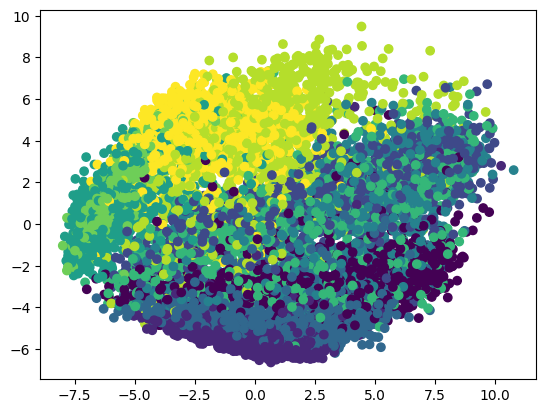

In [38]:
model = PCA() ## Do parameter tunong if you have time


data_pca = model.fit_transform(train_subset)



plt.scatter(data_pca[:, 0], data_pca[:, 1], c = labels_subset)

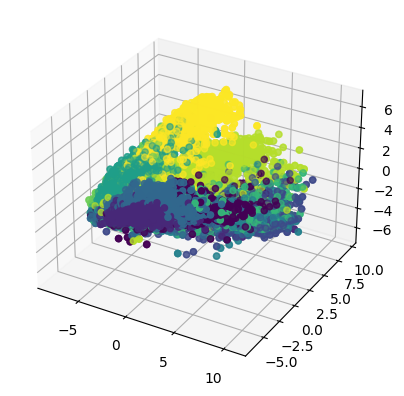

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color the data points based on the labels
for i in range(3):
    ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c = labels_subset)